In [1]:
from IPython.core.display import HTML
from datascience import *
from scipy.stats import chi2_contingency

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Lab 1: Personal Network Surveys

In this lab, we will analyze some data from the [General Social Survey](http://gss.norc.org/) (GSS).
The GSS is the survey that was the basis of the debate over whether or not Americans are becoming more socially isolated, which we discussed in class.

In [2]:
import os
os.getcwd()

'e:\\Academic\\Git\\demog180-admin\\devel\\lab\\lab01'

The file `GSS.csv` has an extract from the GSS which we will analyze today.

Here is the [codebook](http://gss.norc.org/documents/codebook/GSS_Codebook.pdf) for the entire GSS. Of course, the GSS is huge, so you will have to search through for the variable names included in this extract. (Don't do this by hand -- use your pdf viewer's search function.)

Read the GSS extract into a Table called `gss_data`.

In [5]:
gss_data = Table.read_table('GSS.csv')


Let's first take a look at its contents:

In [6]:
gss_data

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1972,1,5,23,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,2,1,70,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,3,1,48,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,4,1,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,5,1,61,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,6,5,26,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,7,3,28,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,8,5,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,9,5,21,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,10,1,30,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1


## Question 1:
How many rows and how many columns does `gss_data` have? 

*Hint: the `Table` object has two attributes, `num_columns` and `num_rows`.*

In [7]:
gss_number_of_rows = gss_data.num_rows # SOLUTION
gss_number_of_cols = gss_data.num_columns # SOLUTION 

print("num rows: ", gss_number_of_rows)
print("num cols: ", gss_number_of_cols)

num rows:  59599
num cols:  20


In [8]:
""" # BEGIN TEST CONFIG
failure_message: Incorrect number of rows
""" # END TEST CONFIG
np.isclose(gss_number_of_rows, 59599)

True

In [9]:
""" # BEGIN TEST CONFIG
failure_message: Incorrect number of columns
""" # END TEST CONFIG
np.isclose(gss_number_of_cols, 20)

True

## Question 2:
What range of years is covered by this dataset? Answer this by finding the largest and smallest year. 

_Hint: You can use the functions max and min that we introduced back in Lab 0_

In [10]:
largest_year = np.max(gss_data.column('year')) # SOLUTION
smallest_year = np.min(gss_data.column('year')) # SOLUTION

print("earliest year: ", smallest_year)
print("latest year: ", largest_year)

earliest year:  1972
latest year:  2014


In [11]:
""" # BEGIN TEST CONFIG
failure_message: Incorrect earliest year. Hint- select a column using `Table.column('column name in quotes')`
""" # END TEST CONFIG
np.isclose(smallest_year, 1972)

True

In [12]:
""" # BEGIN TEST CONFIG
failure_message: Incorrect latest year. Hint- select a column using `Table.column('column name in quotes')`
""" # END TEST CONFIG
np.isclose(largest_year, 2014)

True

In the GSS, we are interested in one question that measures social networks, namely, Question 333: *From time to time, most people discuss important matters with other people. Looking back over the last six months - who are the people with whom
you discussed matters important to you?* (GSS Codebook, p. 572). 

 It turns out that this question was only asked of the survey respondents in 1985 and 2004. In order to continue with our analysis, we will pick out only the rows of the dataset that correspond to the years we are interested in.

## Question 3:
Make two new datasets: `gss_1985` and `gss_2004` which have only the responses from 1985 and 2004, respectively.

*Hint: use functions `Table.where` and `are.equal_to(...)`*

In [13]:
gss_1985 = gss_data.where('year', are.equal_to(1985)) # SOLUTION
gss_2004 = gss_data.where('year', are.equal_to(2004)) # SOLUTION

In [14]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect number of rows. Hint- use functions `Table.where` and `are.equal_to(...)`
""" # END TEST CONFIG
np.isclose(gss_1985.num_rows, 1534)

True

In [15]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect number of rows. Hint- use functions `Table.where` and `are.equal_to(...)`
""" # END TEST CONFIG
np.isclose(gss_2004.num_rows, 2812)

True

## Question 4: 
How many responses are there from 1985, and how many from 2004? 

In [16]:
responses_from_1985 = gss_1985.num_rows # SOLUTION
responses_from_2004 = gss_2004.num_rows # SOLUTION

In [17]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect number of rows
""" # END TEST CONFIG
np.isclose(responses_from_1985, 1534)

True

In [18]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect number of rows
""" # END TEST CONFIG
np.isclose(responses_from_2004, 2812)

True

## Question 5:
We are interested in how many people survey respondents said that they discussed important matters with. That will give us information about the sizes of their personal networks.

Make a table of the values in the `numgiven` column for each year. This tables should show the possible options for `numgiven` and how often that response occurred.

*Hint: use the function `Table.group`.*

In [19]:
gss_1985_numgiven = gss_1985.group('numgiven') # SOLUTION
gss_1985_numgiven

numgiven,count
0,136
1,228
2,235
3,321
4,233
5,294
6,84
9,3


In [20]:
gss_2004_numgiven = gss_2004.group('numgiven') # SOLUTION
gss_2004_numgiven

numgiven,count
-1,1340
0,356
1,281
2,263
3,232
4,128
5,96
6,70
9,46


In [21]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect number of rows. 
""" # END TEST CONFIG
np.isclose(gss_1985_numgiven.num_rows, 8)

True

In [22]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect number of columns
""" # END TEST CONFIG
np.isclose(gss_1985_numgiven.num_columns, 2)

True

In [23]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect number of rows
""" # END TEST CONFIG
np.isclose(gss_2004_numgiven.num_rows, 9)

True

In [24]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect number of columns
""" # END TEST CONFIG
np.isclose(gss_2004_numgiven.num_columns, 2)

True

Your table for 2004 should show that quite a few respondents have -1 as the value of `numgiven`. These respondents actually did not answer the important matters question. Their `numgiven` variable is coded as -1 (*not applicable*), according to the GSS coding scheme. There are also respondents who were asked the important matters question but did not respond. Their `numgiven` variable is coded as 9 (*No answer*). 

 For our analysis, we need to drop those respondents.

## Question 6:
Narrow the 2004 dataset down so that it does not have the respondents who have -1 values for `numgiven`

_Hint: You can use the `are.above` function_

In [25]:
gss_2004_interviewed = gss_2004.where('numgiven', are.above(-1)) # SOLUTION

In [26]:
""" # BEGIN TEST CONFIG
failure_message: Incorrect number of rows
""" # END TEST CONFIG
np.isclose(gss_2004_interviewed.num_rows, 1472)

True

## Question 7:
Narrow both datasets down so that they only have respondents who were asked the important matters question  and who provided answers to that question (i.e., whose value in the `numgiven` column is neither -1 nor 9).

In [27]:
gss_1985.where('numgiven', are.not_equal_to(9)).where('numgiven', are.above(-1))

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1985,1,1,33,6,1,2,1,1,2,2,1,2,2,2,32,29,32,35,29
1985,2,1,49,6,2,1,1,2,1,1,2,2,2,2,42,44,45,40,50
1985,3,5,23,5,2,2,2,2,2,2,2,2,2,2,25,24,46,21,35
1985,4,5,26,5,2,1,1,1,2,2,2,2,2,2,26,27,28,27,25
1985,5,5,24,5,2,2,1,1,1,2,2,2,2,2,44,25,20,19,12
1985,6,5,45,4,1,1,1,2,0,2,2,2,2,0,40,35,44,35,-1
1985,7,5,44,6,2,2,2,2,1,2,2,2,2,2,33,43,41,40,37
1985,8,5,56,5,2,1,2,1,1,2,2,2,2,2,40,50,40,50,65
1985,9,1,85,2,2,1,0,0,0,2,1,0,0,0,45,84,-1,-1,-1
1985,10,5,65,2,2,9,0,0,0,2,2,0,0,0,65,65,-1,-1,-1


In [28]:
gss_1985.where('numgiven', are.not_equal_to(9))
# gss_2004_interviewed.where('numgiven', are.not_equal_to(9))

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1985,1,1,33,6,1,2,1,1,2,2,1,2,2,2,32,29,32,35,29
1985,2,1,49,6,2,1,1,2,1,1,2,2,2,2,42,44,45,40,50
1985,3,5,23,5,2,2,2,2,2,2,2,2,2,2,25,24,46,21,35
1985,4,5,26,5,2,1,1,1,2,2,2,2,2,2,26,27,28,27,25
1985,5,5,24,5,2,2,1,1,1,2,2,2,2,2,44,25,20,19,12
1985,6,5,45,4,1,1,1,2,0,2,2,2,2,0,40,35,44,35,-1
1985,7,5,44,6,2,2,2,2,1,2,2,2,2,2,33,43,41,40,37
1985,8,5,56,5,2,1,2,1,1,2,2,2,2,2,40,50,40,50,65
1985,9,1,85,2,2,1,0,0,0,2,1,0,0,0,45,84,-1,-1,-1
1985,10,5,65,2,2,9,0,0,0,2,2,0,0,0,65,65,-1,-1,-1


In [29]:
gss_1985_responded = gss_1985.where('numgiven', are.not_equal_to(9)) # SOLUTION #
gss_2004_responded = gss_2004_interviewed.where('numgiven', are.not_equal_to(9)) # SOLUTION #

In [30]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect number of columns. 
""" # END TEST CONFIG
np.isclose(gss_2004_responded.num_rows, 1426)

True

In [31]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect number of columns
""" # END TEST CONFIG
np.isclose(gss_1985_responded.num_rows, 1531)

True

Now we have the set of respondents we will study in more detail: those who responded to the 'important matters' question.

**For the problems below, please use `gss_1985_responded` and `gss_2004_responded`.**

Many analysts have focused on how many survey respondents report that they don't discuss important matters with anyone.  They interpret the fraction of respondents who don't report discussing important matters with anyone as an indicator for the amount of social isolation. (These respondents who report not discussing important matters with anyone have `numgiven` equal to 0.)

## Question 8:
Do you think this is a good way to try to quantify social isolation? Name one way this could be a good measure of social isolation, and one way this could be a bad measure of social isolation. Please be specific.

Your response here.

## Question 9:
For both the 1985 and 2004 datasets, create a new variable, `isolated` which has the value False if the respondent reports discussing important matters with anyone (`numgiven` not equal to 0), and True otherwise (`numgiven` equals to 0).


In [32]:
isolated_1985 = gss_1985_responded.column("numgiven") == 0 # SOLUTION
isolated_2004 = gss_2004_responded.column("numgiven") == 0 # SOLUTION

In [33]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect number
""" # END TEST CONFIG
np.isclose(sum(isolated_1985),136)

True

In [34]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect number
""" # END TEST CONFIG
np.isclose(sum(isolated_2004), 356)

True

## Question 10:
Using the variable you just created, what proportion of respondents was socially isolated in 1985? In 2004?

*Hint: we learned how to calculate mean in Lab0*

In [35]:
proportion_isolated_1985 = np.mean(isolated_1985) # SOLUTION
proportion_isolated_2004 = np.mean(isolated_2004) # SOLUTION

print("Proportion isolated in 1985: ", proportion_isolated_1985)
print("Proportion isolated in 2004: ", proportion_isolated_2004)

Proportion isolated in 1985:  0.0888308295232
Proportion isolated in 2004:  0.249649368864


In [36]:
""" # BEGIN TEST CONFIG
failure_message: 1985 survey incorrect proportion isolated
""" # END TEST CONFIG
round(proportion_isolated_1985, 3) == 0.089

True

In [37]:
""" # BEGIN TEST CONFIG
failure_message: 2004 survey incorrect proportion isolated
""" # END TEST CONFIG
round(proportion_isolated_2004, 3) == 0.25

True

### Hypothesis Testing:

Null Hypothesis (H0): The proportion of isolated GSS respondents is the same in 1985 and 2004.

Alternative Hypothesis (H1): The proportion of isolated GSS respondents differs between 1985 and 2004.

In [42]:
print(sum(isolated_1985))
print(sum(isolated_2004))
print(gss_1985_responded.num_rows)
print(gss_2004_responded.num_rows)

136
356
1531
1426


1070

|| GSS 1985 | GSS 2004 |
|--------------|-------------|-----------------|
| Isolated | 136 |  356 |
| Not Isolated | 1395 | 1070 |
| Total | 1531 | 1426 |

In [58]:
# Pearson's Chi-Square Test
table = [np.array([sum(isolated_1985), sum(isolated_2004)]), 
         np.array([gss_1985_responded.num_rows, gss_2004_responded.num_rows])         ]

stat, p, dof, expected = chi2_contingency(table)
print(stat, p)


97.4133235946 5.62661469187e-23


## Question 11:

###  Converting from wide to long

So far, we have only looked at the relationship between the survey respondents and the first alter that they mentioned. However, we designed our survey so that respondents could tell us about up to five alters. In order to look at all of the alters respondents reported about, we're going to have to manipulate the dataset a bit more extensively. This manipulation is a little bit tricky, but we're going to go through how it can be done step by step.

First, let's take a look at the first few rows of the dataset again to remind ourselves of how it is structured:

In [62]:
gss_data.show(6)

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1972,1,5,23,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,2,1,70,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,3,1,48,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,4,1,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,5,1,61,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,6,5,26,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1


The dataset is in *wide* format: all of the information reported by a respondent is stored in a single row:

[respondent 1 info] ... [info about respondent 1's first alter] ... [info about respondent 1's second alter] ...   
[respondent 2 info] ... [info about respondent 2's first alter] ... [info about respondent 2's second alter] ...   
...

Our goal is to reshape the dataset so that the information is in *long* format instead:

[respondent 1 info] [info about respondent 1's first alter]  
[respondent 1 info] [info about respondent 1's second alter]  
[respondent 1 info] [info about respondent 1's third alter]  
[respondent 1 info] [info about respondent 1's fourth alter]  
[respondent 1 info] [info about respondent 1's fifth alter]  
[respondent 2 info] [info about respondent 2's first alter]  
[respondent 2 info] [info about respondent 2's second alter]  
...

In order to convert the alter information from wide to long format, we're going to use two functions that have been written for you below.

Let's look at the function below and try to understand how it works.

PS The portion highlighted in red is called a docstring. It describes what the function does and gives examples. The code following ">>>" is fully executable and the following line is what that function call should return.

In [ ]:
def repeat_single_col(data, var_name, times=5):
    """Repeats a single column multiple times.
    
    Parameters
    ----------
    var_name : str
        Text that contains the name of the column to repeat.
    
    Returns
    -------
    np.array
        A single array with the contents of the column repeated five times.
    
    Examples
    --------
    >>> repeat_single_col(Table().with_columns(['respondent_age', [10]]),
                          'respondent_age')
    
    array([10, 10, 10, 10, 10])
    """
    new_col = np.tile(data.column(var_name), times)
    return new_col

def wide_to_long(data, var_name, times=5):
    """Given columns of alter characteristics, stack them into one long column.
    
    Parameters
    ----------
    data : Table
        The data table containing the alter characteristics
    var_name : str
        Text that contains the variable name; columns of the dataset should
        match the pattern: [var_name][alter_number]
        For example, if var_name is 'age' then this function expects to find
        columns in the survey dataset named 
        'age1', 'age2', 'age3', 'age4', and 'age5'
    times : int
        The number of columns for each characteristic
    
    Returns
    -------
    np.array
        A single array with the contents of all of the columns stacked on top of one another.
    
    Examples
    --------
    >>> wide_to_long(Table().with_columns(['age1', [10, 15],
                                           'age2', [30, 35],
                                           'age3', [20, 15],
                                           'age4', [60, 70],
                                           'age5', [20, 25]]),
                     'age')
    
    array([10, 15, 30, 35, 20, 15, 60, 70, 20, 25])
    """
    new_col = np.concatenate([data.column(var_name + str(idx)) for idx in range(1,times+1)])
    return new_col

In [ ]:
# BEGIN SOLUTION NO PROMPT
gss_1985_long_raw = Table().with_columns([
    'respondent_age', repeat_single_col(gss_1985_responded, 'age'),
    'alter_age', wide_to_long(gss_1985_responded, 'age'),
    'alter_gender', wide_to_long(gss_1985_responded, 'sex')])
gss_2004_long_raw = Table().with_columns([
    'respondent_age', repeat_single_col(gss_2004_responded, 'age'),
    'alter_age', wide_to_long(gss_2004_responded, 'age'),
    'alter_gender', wide_to_long(gss_2004_responded, 'sex')])
# END SOLUTION
""" # BEGIN PROMPT
gss_1985_long_raw = ...
gss_2004_long_raw = ...
"""; # END PROMPT

In [ ]:
""" # BEGIN TEST CONFIG
failure_message: 1985 incorrect number of rows. Hint- use `repeat_single_col` to replicate ego information and `wide_to_long` to pivot the alter information, as done in lab1
""" # END TEST CONFIG
gss_1985_long_raw.num_rows == 7655

True

In [ ]:
""" # BEGIN TEST CONFIG
failure_message: 2004 incorrect number of rows. Hint- use `repeat_single_col` to replicate ego information and `wide_to_long` to pivot the alter information, as done in lab1
""" # END TEST CONFIG
gss_2004_long_raw.num_rows == 7130

True

In [ ]:
gss_1985_responded.show(10)

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1985,1,1,33,6,1,2,1,1,2,2,1,2,2,2,32,29,32,35,29
1985,2,1,49,6,2,1,1,2,1,1,2,2,2,2,42,44,45,40,50
1985,3,5,23,5,2,2,2,2,2,2,2,2,2,2,25,24,46,21,35
1985,4,5,26,5,2,1,1,1,2,2,2,2,2,2,26,27,28,27,25
1985,5,5,24,5,2,2,1,1,1,2,2,2,2,2,44,25,20,19,12
1985,6,5,45,4,1,1,1,2,0,2,2,2,2,0,40,35,44,35,-1
1985,7,5,44,6,2,2,2,2,1,2,2,2,2,2,33,43,41,40,37
1985,8,5,56,5,2,1,2,1,1,2,2,2,2,2,40,50,40,50,65
1985,9,1,85,2,2,1,0,0,0,2,1,0,0,0,45,84,-1,-1,-1
1985,10,5,65,2,2,9,0,0,0,2,2,0,0,0,65,65,-1,-1,-1


## Question 13:
Not all respondents reported 5 alters. In cases where alter information is missing, `alter_age` is coded as -1. Furthermore, in cases where respondents did report about an alter, but they did not know or refused to give the alter's age, [the codebook](http://gss.norc.org/documents/codebook/GSS_Codebook.pdf) tells use that `alter_age` will have the value 98 or 99.

Create the Tables gss_1985_long and gss_2004_long, which start from `gss_1985_long_raw` and `gss_2004_long_raw` and filter out rows where `alter_age` equals -1, 98, or 99 so that we are left with only actual reported alters whose age was given.

Hint: use `.where()` to perform filtering.

In [ ]:
# BEGIN SOLUTION NO PROMPT
gss_1985_long = gss_1985_long_raw.where('alter_age', are.not_equal_to(-1))
gss_1985_long = gss_1985_long.where('alter_age', are.not_equal_to(98))
gss_1985_long = gss_1985_long.where('alter_age', are.not_equal_to(99))

gss_2004_long = gss_2004_long_raw.where('alter_age', are.not_equal_to(-1))
gss_2004_long = gss_2004_long.where('alter_age', are.not_equal_to(98))
gss_2004_long = gss_2004_long.where('alter_age', are.not_equal_to(99))
# END SOLUTION 
""" # BEGIN PROMPT
gss_1985_long = gss_1985_long_raw.where(...)
gss_1985_long = gss_1985_long.where(...)
gss_1985_long = gss_1985_long.where(...)

gss_2004_long = gss_2004_long_raw.where(...)
gss_2004_long = gss_2004_long.where(...)
gss_2004_long = gss_2004_long.where(...)
"""; # END PROMPT

In [ ]:
""" # BEGIN TEST CONFIG
failure_message: 1985 incorrect number of rows. 
""" # END TEST CONFIG
gss_1985_long.num_rows == 4429

True

In [ ]:
""" # BEGIN TEST CONFIG
failure_message: 2004 incorrect number of rows. 
""" # END TEST CONFIG
gss_2004_long.num_rows == 2811

True

## Question 14:
Create a scatterplot of the respondent's age and the alter's age (make a separate plot for 1985 and for 2004).

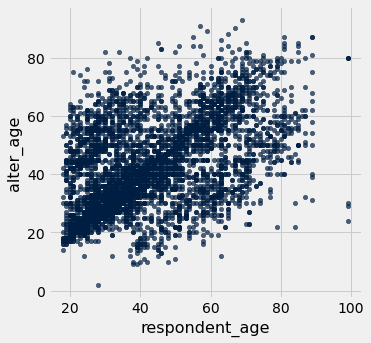

In [ ]:
# BEGIN SOLUTION NO PROMPT
gss_1985_long.scatter('respondent_age', 'alter_age')
# END SOLUTION
""" # BEGIN PROMPT
gss_1985_long.scatter(...)
"""; # END PROMPT

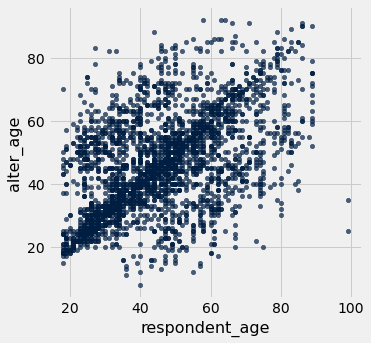

In [ ]:
# BEGIN SOLUTION NO PROMPT
gss_2004_long.scatter('respondent_age', 'alter_age')
# END SOLUTION
""" # BEGIN PROMPT
gss_2004_long.scatter(...)
"""; # END PROMPT

### Sampling Variation and Bootstrapping

In the graphs above, we visualized the degree distribution for different Add Health networks. You can see that these networks vary in the number of nodes, edges, degrees, and components. Variation is a natural part of real-world data.

However, most data we collect is based on a "sample" of some sort. For example, the dataset we will create with your Homework 1 personal networks survey tells us something about the personal networks of Berkeley students.
But if we talked to a different set of Berkeley students, we could get a different answer. How do we know if what we observe in our sample is a good reflection of the real world? How does the variation in our sample relate to variation in the real world?

We can actually estimate the sampling variation within our data, if we assume our data is sampled randomly. (This is a stretch, of course - we won't actually take a random sample. What difference might we expect between the people in our dataset and a randomly selected set of Berkeley students?)

In order to estimate the sampling variation, we'll use an approach called resampling or the bootstrap. This is a topic we'll cover in more depth later, but this is a quick introduction.

Bootstrapping involves resampling the data. If we picture our data sample as a bag of coins, where each coin is an observation, bootstrapping is the processing of reaching back into the bag and randomly drawing from the sample we've already collected. Let us resample the number of nodes in the Add Health networks:


In [ ]:
resampled_survey = gss_data.select('numgiven').sample()

To see what happened here, let's look at resampled_survey:

In [ ]:
resampled_survey

numgiven
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


`resampled_survey` is a random sample of the data from the `number of nodes` values recorded in the original survey dataset.
To estimate the sampling variation, we need many resamples. So we'll stick the resampling in a loop:

In [ ]:
resampled_number_nodes = make_array()

for _ in np.arange(10000):
    # NB: num_responses rows in our dataset
    resampled_survey = gss_data.select('numgiven').sample()  # resample the survey
    resampled_number_nodes = np.append(resampled_number_nodes, 
                                        np.mean(resampled_survey['numgiven'])) # calculate the mean and add it to our list of means
resampled_net_size = Table().with_column('numgiven', resampled_number_nodes)

KeyboardInterrupt: 

'resampled_number_nodes' now has the average number of nodes calculated for many different resamples of our data.

Let's look at the distribution of resampled number of nodes

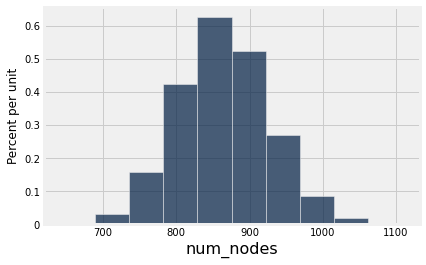

In [ ]:
resampled_net_size.hist('num_nodes')